In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import nir
graph = nir.read('scnn_mnist.nir')

import nengo
import numpy as np
import nir_to_nengo

In [3]:
import tonic
import torch
bs = 1
collate = tonic.collation.PadTensors(batch_first=False)
to_frame = tonic.transforms.ToFrame(sensor_size=tonic.datasets.NMNIST.sensor_size, time_window=1e3)
test_ds = tonic.datasets.NMNIST("./nmnist", transform=to_frame, train=False)
test_dl = torch.utils.data.DataLoader(test_ds, shuffle=True, batch_size=bs, collate_fn=collate)

In [4]:
dt = 0.001

confusion = np.zeros((10,10))
for idx, (x, y) in enumerate(test_dl):
    model2 = nengo.Network()
    model, nengo_map = nir_to_nengo.nir_to_nengo(graph)
    model2.networks.append(model)
    with model2:
        stim=nengo.Node(nengo.processes.PresentInput(x.reshape((x.shape[0],2*34*34)), presentation_time=dt))
        nengo.Connection(stim, nengo_map['input'], synapse=None)
        p = nengo.Probe(nengo_map['output'])
        
    sim = nengo.Simulator(model2, dt=dt, progress_bar=None)
    sim.run(x.shape[0]*dt)
    
    y = y.numpy()[0]
    result = np.argmax(np.sum(sim.data[p], axis=0))
    if y!=result:
        print(f'{idx}  correct:{y}  output:{result}')
    confusion[y,result] += 1
    
    if (idx+1) % 50 == 0:
        print(idx, np.sum(np.diag(confusion))/np.sum(confusion))
        print(confusion)
        
    

27  correct:6  output:5
49 0.98
[[7. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 5. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 6. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 9. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 4. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 6. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]
99  correct:0  output:7
99 0.98
[[10.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 10.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 14.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 12.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  7.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  6.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  7.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 10.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 12.]]
140  correct:0  output:4
142  correct:0  output:5
149 0.9733333333333334
[[16.  0.  0.  0.  1.  1.  0.  1.  0.  0.]
 [ 0. 15.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 18.  

949 0.98
[[ 95.   0.   0.   0.   2.   1.   0.   1.   0.   0.]
 [  0. 115.   0.   0.   1.   0.   0.   1.   0.   0.]
 [  0.   0.  92.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 103.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  93.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   2.   0.  72.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   2.  95.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.   0.  92.   0.   0.]
 [  0.   0.   1.   1.   1.   1.   0.   0.  86.   0.]
 [  0.   0.   0.   0.   2.   0.   0.   1.   0.  88.]]
999 0.981
[[ 98.   0.   0.   0.   2.   1.   0.   1.   0.   0.]
 [  0. 118.   0.   0.   1.   0.   0.   1.   0.   0.]
 [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 106.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 103.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   2.   0.  75.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   2. 100.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.   0.  94.   0.   0.]
 [  0.   0.   1.   1.   1.

1699 0.9794117647058823
[[163.   0.   0.   0.   2.   2.   0.   1.   1.   0.]
 [  0. 194.   0.   0.   1.   0.   0.   1.   0.   0.]
 [  0.   0. 168.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 167.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 169.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   2.   0. 149.   0.   0.   0.   0.]
 [  0.   1.   0.   0.   0.   8. 159.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.   0. 165.   0.   0.]
 [  0.   0.   2.   2.   1.   2.   0.   1. 154.   1.]
 [  0.   0.   0.   0.   3.   1.   0.   1.   0. 177.]]
1748  correct:7  output:2
1749 0.9794285714285714
[[167.   0.   0.   0.   2.   2.   0.   1.   1.   0.]
 [  0. 196.   0.   0.   1.   0.   0.   1.   0.   0.]
 [  0.   0. 173.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 172.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 172.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   2.   0. 152.   0.   0.   0.   0.]
 [  0.   1.   0.   0.   0.   8. 164.   0.   0.   0.]
 [  0.   0.   1.   1.   

2449 0.98
[[240.   0.   0.   0.   2.   2.   0.   1.   1.   0.]
 [  0. 277.   0.   0.   1.   0.   0.   1.   0.   0.]
 [  0.   0. 237.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 243.   0.   1.   0.   1.   1.   0.]
 [  0.   0.   0.   0. 244.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   2.   0. 228.   0.   0.   0.   0.]
 [  0.   2.   0.   0.   1.  10. 217.   0.   0.   0.]
 [  0.   0.   1.   1.   0.   0.   0. 235.   0.   0.]
 [  0.   0.   3.   2.   1.   2.   0.   1. 238.   3.]
 [  0.   0.   0.   0.   4.   2.   0.   1.   0. 242.]]
2499 0.9804
[[244.   0.   0.   0.   2.   2.   0.   1.   1.   0.]
 [  0. 283.   0.   0.   1.   0.   0.   1.   0.   0.]
 [  0.   0. 241.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 249.   0.   1.   0.   1.   1.   0.]
 [  0.   0.   0.   0. 249.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   2.   0. 231.   0.   0.   0.   0.]
 [  0.   2.   0.   0.   1.  10. 224.   0.   0.   0.]
 [  0.   0.   1.   1.   0.   0.   0. 237.   0.   0.]
 [  0.   0.   3.   2.  

3155  correct:5  output:0
3172  correct:0  output:2
3191  correct:8  output:3
3199 0.9815625
[[308.   0.   1.   0.   2.   2.   0.   1.   1.   0.]
 [  0. 374.   0.   0.   1.   0.   0.   1.   0.   0.]
 [  0.   0. 314.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 316.   0.   1.   0.   1.   1.   0.]
 [  0.   0.   0.   0. 316.   0.   0.   1.   0.   0.]
 [  1.   0.   0.   2.   0. 284.   0.   0.   0.   0.]
 [  0.   2.   0.   0.   1.  11. 291.   0.   0.   0.]
 [  0.   0.   1.   1.   0.   0.   0. 315.   0.   0.]
 [  0.   0.   4.   4.   1.   4.   0.   1. 299.   3.]
 [  0.   0.   0.   0.   4.   4.   0.   1.   0. 324.]]
3213  correct:2  output:1
3249 0.9815384615384616
[[310.   0.   1.   0.   2.   2.   0.   1.   1.   0.]
 [  0. 379.   0.   0.   1.   0.   0.   1.   0.   0.]
 [  0.   1. 321.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 320.   0.   1.   0.   1.   1.   0.]
 [  0.   0.   0.   0. 322.   0.   0.   1.   0.   0.]
 [  1.   0.   0.   2.   0. 291.   0.   0.   0.   0.]
 [  0.  

3853  correct:6  output:5
3899 0.9807692307692307
[[377.   0.   1.   0.   2.   3.   0.   1.   2.   0.]
 [  0. 460.   0.   0.   2.   1.   0.   1.   0.   0.]
 [  0.   1. 386.   2.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1. 384.   0.   1.   0.   1.   1.   0.]
 [  0.   0.   0.   0. 369.   0.   0.   1.   0.   0.]
 [  1.   0.   0.   2.   0. 369.   0.   0.   0.   0.]
 [  0.   2.   0.   0.   1.  13. 347.   0.   0.   0.]
 [  0.   0.   1.   1.   0.   0.   0. 385.   0.   0.]
 [  0.   0.   4.   6.   1.   5.   0.   1. 363.   3.]
 [  0.   0.   1.   0.   5.   6.   0.   1.   0. 385.]]
3915  correct:6  output:5
3949 0.9807594936708861
[[382.   0.   1.   0.   2.   3.   0.   1.   2.   0.]
 [  0. 467.   0.   0.   2.   1.   0.   1.   0.   0.]
 [  0.   1. 390.   2.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1. 387.   0.   1.   0.   1.   1.   0.]
 [  0.   0.   0.   0. 374.   0.   0.   1.   0.   0.]
 [  1.   0.   0.   2.   0. 373.   0.   0.   0.   0.]
 [  0.   2.   0.   0.   1.  14. 352.   0.   0.   0.

4617  correct:6  output:5
4649 0.981505376344086
[[446.   0.   1.   0.   2.   3.   0.   1.   2.   0.]
 [  0. 541.   0.   0.   2.   1.   0.   1.   0.   0.]
 [  0.   1. 461.   3.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   2. 457.   0.   1.   0.   1.   1.   0.]
 [  0.   0.   0.   0. 454.   0.   0.   1.   0.   0.]
 [  1.   0.   0.   2.   0. 440.   0.   0.   0.   0.]
 [  0.   2.   1.   0.   1.  17. 415.   0.   0.   0.]
 [  0.   0.   1.   2.   0.   0.   0. 457.   0.   0.]
 [  0.   0.   4.   6.   1.   5.   0.   1. 428.   5.]
 [  0.   0.   1.   0.   5.   6.   0.   1.   0. 465.]]
4684  correct:8  output:5
4699 0.9814893617021276
[[453.   0.   1.   0.   2.   3.   0.   1.   2.   0.]
 [  0. 549.   0.   0.   2.   1.   0.   1.   0.   0.]
 [  0.   1. 464.   3.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   2. 461.   0.   1.   0.   1.   1.   0.]
 [  0.   0.   0.   0. 458.   0.   0.   1.   0.   0.]
 [  1.   0.   0.   2.   0. 444.   0.   0.   0.   0.]
 [  0.   2.   1.   0.   1.  17. 420.   0.   0.   0.]

5364  correct:6  output:5
5399 0.9814814814814815
[[518.   0.   1.   0.   2.   3.   1.   1.   2.   0.]
 [  0. 628.   0.   0.   2.   2.   0.   1.   0.   1.]
 [  0.   1. 534.   3.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   2. 534.   0.   1.   0.   1.   1.   0.]
 [  0.   0.   0.   0. 522.   0.   0.   1.   0.   0.]
 [  1.   0.   0.   2.   0. 496.   0.   0.   0.   0.]
 [  0.   2.   1.   0.   1.  19. 485.   0.   0.   0.]
 [  0.   1.   1.   2.   0.   0.   0. 531.   1.   0.]
 [  0.   0.   5.   7.   1.   7.   0.   1. 509.   6.]
 [  0.   0.   1.   0.   6.   6.   0.   2.   0. 543.]]
5413  correct:8  output:3
5449 0.9814678899082568
[[524.   0.   1.   0.   2.   3.   1.   1.   2.   0.]
 [  0. 634.   0.   0.   2.   2.   0.   1.   0.   1.]
 [  0.   1. 539.   3.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   2. 539.   0.   1.   0.   1.   1.   0.]
 [  0.   0.   0.   0. 531.   0.   0.   1.   0.   0.]
 [  1.   0.   0.   2.   0. 501.   0.   0.   0.   0.]
 [  0.   2.   1.   0.   1.  19. 486.   0.   0.   0.

6099 0.9808196721311475
[[582.   0.   2.   0.   2.   3.   1.   1.   3.   0.]
 [  0. 698.   0.   0.   2.   2.   0.   2.   0.   1.]
 [  0.   1. 601.   3.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   2. 600.   0.   1.   0.   1.   1.   0.]
 [  0.   0.   0.   0. 584.   0.   0.   1.   0.   0.]
 [  1.   0.   0.   3.   0. 569.   0.   0.   0.   0.]
 [  0.   3.   1.   0.   1.  23. 554.   0.   0.   0.]
 [  0.   2.   1.   2.   0.   0.   0. 610.   1.   0.]
 [  0.   0.   5.  10.   1.  10.   0.   1. 578.   6.]
 [  0.   0.   1.   1.   6.   6.   0.   2.   0. 607.]]
6149 0.9809756097560975
[[587.   0.   2.   0.   2.   3.   1.   1.   3.   0.]
 [  0. 701.   0.   0.   2.   2.   0.   2.   0.   1.]
 [  0.   1. 610.   3.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   2. 606.   0.   1.   0.   1.   1.   0.]
 [  0.   0.   0.   0. 588.   0.   0.   1.   0.   0.]
 [  1.   0.   0.   3.   0. 575.   0.   0.   0.   0.]
 [  0.   3.   1.   0.   1.  23. 556.   0.   0.   0.]
 [  0.   2.   1.   2.   0.   0.   0. 619.   1.   0

6814  correct:4  output:8
6820  correct:8  output:3
6849 0.981021897810219
[[651.   0.   2.   0.   2.   3.   1.   1.   3.   0.]
 [  0. 774.   0.   0.   2.   2.   0.   2.   0.   1.]
 [  0.   1. 668.   4.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   2. 680.   0.   1.   0.   1.   1.   0.]
 [  0.   0.   0.   0. 644.   0.   0.   1.   1.   1.]
 [  1.   0.   0.   4.   0. 632.   0.   0.   0.   0.]
 [  1.   3.   1.   0.   2.  23. 631.   0.   0.   0.]
 [  0.   2.   2.   2.   0.   0.   0. 708.   1.   0.]
 [  0.   0.   5.  12.   1.  12.   0.   1. 658.   6.]
 [  0.   0.   1.   1.   7.   7.   0.   2.   0. 674.]]
6899 0.981159420289855
[[655.   0.   2.   0.   2.   3.   1.   1.   3.   0.]
 [  0. 779.   0.   0.   2.   2.   0.   2.   0.   1.]
 [  0.   1. 676.   4.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   2. 686.   0.   1.   0.   1.   1.   0.]
 [  0.   0.   0.   0. 651.   0.   0.   1.   1.   1.]
 [  1.   0.   0.   4.   0. 635.   0.   0.   0.   0.]
 [  1.   3.   1.   0.   2.  23. 635.   0.   0.   0.]


7599 0.9813157894736843
[[729.   0.   2.   1.   2.   4.   2.   1.   3.   0.]
 [  0. 855.   0.   0.   2.   2.   0.   2.   0.   1.]
 [  0.   1. 748.   4.   0.   0.   0.   2.   0.   0.]
 [  0.   0.   2. 746.   0.   1.   0.   1.   1.   0.]
 [  0.   0.   0.   0. 735.   0.   0.   1.   1.   1.]
 [  1.   0.   0.   4.   0. 695.   0.   0.   0.   0.]
 [  1.   3.   1.   0.   2.  25. 696.   0.   0.   0.]
 [  0.   2.   2.   2.   0.   0.   0. 788.   1.   0.]
 [  0.   0.   6.  13.   1.  12.   0.   1. 723.   9.]
 [  0.   0.   1.   1.   7.   7.   0.   3.   0. 743.]]
7609  correct:9  output:7
7611  correct:2  output:4
7649 0.9811764705882353
[[736.   0.   2.   1.   2.   4.   2.   1.   3.   0.]
 [  0. 860.   0.   0.   2.   2.   0.   2.   0.   1.]
 [  0.   1. 753.   4.   1.   0.   0.   2.   0.   0.]
 [  0.   0.   2. 752.   0.   1.   0.   1.   1.   0.]
 [  0.   0.   0.   0. 738.   0.   0.   1.   1.   1.]
 [  1.   0.   0.   4.   0. 701.   0.   0.   0.   0.]
 [  1.   3.   1.   0.   2.  25. 699.   0.   0.   0.

8349 0.9811976047904192
[[815.   0.   2.   1.   2.   4.   2.   1.   3.   0.]
 [  0. 945.   0.   0.   2.   2.   0.   2.   0.   1.]
 [  0.   1. 839.   4.   1.   0.   0.   3.   0.   0.]
 [  0.   0.   2. 818.   0.   1.   0.   3.   1.   0.]
 [  0.   0.   0.   0. 819.   0.   0.   1.   1.   1.]
 [  1.   0.   0.   4.   0. 746.   0.   0.   0.   0.]
 [  1.   4.   1.   0.   2.  30. 766.   0.   0.   0.]
 [  0.   2.   2.   2.   0.   0.   0. 855.   1.   0.]
 [  0.   0.   6.  14.   1.  14.   0.   1. 784.   9.]
 [  0.   0.   1.   1.   7.   8.   0.   4.   0. 806.]]
8388  correct:7  output:2
8399 0.9811904761904762
[[821.   0.   2.   1.   2.   4.   2.   1.   3.   0.]
 [  0. 949.   0.   0.   2.   2.   0.   2.   0.   1.]
 [  0.   1. 840.   4.   1.   0.   0.   3.   0.   0.]
 [  0.   0.   2. 821.   0.   1.   0.   3.   1.   0.]
 [  0.   0.   0.   0. 821.   0.   0.   1.   1.   1.]
 [  1.   0.   0.   4.   0. 750.   0.   0.   0.   0.]
 [  1.   4.   1.   0.   2.  30. 776.   0.   0.   0.]
 [  0.   2.   3.   2.   

8962  correct:8  output:9
8997  correct:8  output:3
8999 0.9807777777777777
[[8.750e+02 0.000e+00 2.000e+00 1.000e+00 2.000e+00 5.000e+00 2.000e+00
  1.000e+00 4.000e+00 0.000e+00]
 [0.000e+00 1.018e+03 0.000e+00 1.000e+00 2.000e+00 2.000e+00 0.000e+00
  2.000e+00 0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00 9.070e+02 4.000e+00 1.000e+00 0.000e+00 0.000e+00
  3.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 2.000e+00 8.890e+02 0.000e+00 1.000e+00 0.000e+00
  3.000e+00 1.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 8.850e+02 0.000e+00 0.000e+00
  1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 5.000e+00 0.000e+00 7.990e+02 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 4.000e+00 1.000e+00 0.000e+00 2.000e+00 3.500e+01 8.200e+02
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 2.000e+00 4.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.190e+02 1.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 6.000e+00 1.600e+01 1.000e+00 1.400e+01 0.000e+00
  1.000e+00 

9378  correct:3  output:5
9399 0.9807446808510638
[[9.160e+02 0.000e+00 2.000e+00 1.000e+00 2.000e+00 5.000e+00 2.000e+00
  1.000e+00 4.000e+00 0.000e+00]
 [0.000e+00 1.062e+03 0.000e+00 1.000e+00 2.000e+00 2.000e+00 0.000e+00
  2.000e+00 0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00 9.440e+02 5.000e+00 1.000e+00 0.000e+00 0.000e+00
  4.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 2.000e+00 9.310e+02 0.000e+00 2.000e+00 0.000e+00
  3.000e+00 1.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 9.280e+02 0.000e+00 0.000e+00
  1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 6.000e+00 0.000e+00 8.320e+02 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 4.000e+00 1.000e+00 0.000e+00 2.000e+00 3.600e+01 8.560e+02
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 2.000e+00 4.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.580e+02 1.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 7.000e+00 1.700e+01 1.000e+00 1.400e+01 0.000e+00
  2.000e+00 8.680e+02 1.000e+01]
 [0.0

9753  correct:9  output:7
9790  correct:6  output:1
9799 0.9810204081632653
[[9.480e+02 0.000e+00 2.000e+00 1.000e+00 2.000e+00 5.000e+00 2.000e+00
  1.000e+00 4.000e+00 0.000e+00]
 [1.000e+00 1.105e+03 0.000e+00 1.000e+00 2.000e+00 2.000e+00 0.000e+00
  2.000e+00 0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00 9.950e+02 5.000e+00 1.000e+00 0.000e+00 0.000e+00
  4.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 2.000e+00 9.830e+02 0.000e+00 2.000e+00 0.000e+00
  3.000e+00 1.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 9.590e+02 0.000e+00 0.000e+00
  1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 6.000e+00 0.000e+00 8.660e+02 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 5.000e+00 1.000e+00 0.000e+00 2.000e+00 3.700e+01 8.910e+02
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 2.000e+00 4.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.005e+03 1.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 7.000e+00 1.700e+01 1.000e+00 1.400e+01 0.000e+00
  2.000e+00 

In [5]:
np.save("nengo_accuracy.npy", np.sum(np.diag(confusion))/np.sum(confusion))

In [6]:
numbers = np.load("val_numbers.npy")

nengo_activity = np.empty((300,10,16,16,16))

for i in range(10):
    model2 = nengo.Network()
    model, nengo_map = nir_to_nengo.nir_to_nengo(graph)
    model2.networks.append(model)
    with model2:
        stim=nengo.Node(nengo.processes.PresentInput(numbers[:,i].reshape((numbers.shape[0],2*34*34)), presentation_time=dt))
        nengo.Connection(stim, nengo_map['input'], synapse=None)
        p = nengo.Probe(nengo_map['output'])
        p_1 = nengo.Probe(nengo_map['1'])
        
        sim = nengo.Simulator(model2, progress_bar=False)
        with sim:
            sim.run(numbers.shape[0]*dt)
        nengo_activity[:,i] = sim.data[p_1].reshape((300,16,16,16))

np.save("nengo_activity.npy", nengo_activity)

In [7]:
lava_activity = np.load('lava_activity.npy')

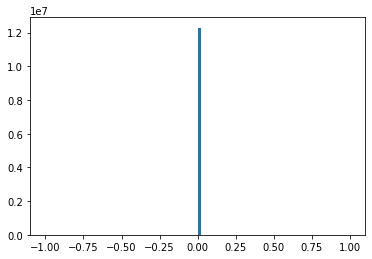

In [8]:
diff = lava_activity - nengo_activity

plt.hist(diff.flatten(), bins=100)
plt.show()